In [1]:
# Facial Recognition Project
# ANN using sigmoid

import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%run util.ipynb

In [5]:
class ANN(object):
    def __init__(self,M):
        self.M = M
        
    def fit(self,X,Y,learning_rate=5*10e-7,reg=1.0,epochs=10000, show_fig=False):
        X,Y = shuffle(X,Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X,Y = X[:-1000], Y[:-1000]

        N,D = X.shape
        self.W1 = np.random.randn(D,self.M) / np.sqrt(D+self.M)
        self.b1 = np.zeros(self.M)
        # this is for 2 classes only so no K
        self.W2 = np.random.randn(self.M) / np.sqrt(self.M)
        self.b2 = 0

        costs = []
        best_validation_error = 1

        for i in range(epochs):
            # forward propagation
            pY, Z = self.forward(X)

            # gradient descent step
            pY_Y = pY-Y
            self.W2 -= learning_rate*(Z.T.dot(pY_Y) + reg*self.W2)
            self.b2 -= learning_rate*(pY_Y).sum(axis=0)

            # this is another way of writing this
            dz = np.outer(pY_Y,self.W2)*(1-Z*Z)

            self.W1 -= learning_rate*(X.T.dot(dz) + reg*self.W1) 
            self.b1 -= learning_rate*(np.sum(dz,axis=0) + reg*self.b1)

            if i%20==0:
                pYvalid, _ = self.forward(Xvalid)
                c = sigmoid_cost(Yvalid,pYvalid)
                costs.append(c)
                e = error_rate(Yvalid,np.round(pYvalid))
                print(f"i: {i}, c:{c}, e:{e}")
                if e < best_validation_error:
                    best_validation_error = e

        print(f"best validation error : {best_validation_error}")

        if show_fig:
            plt.plot(costs)
            plt.show()
            
    def forward(self,X):
#         Z = relu(X.dot(self.W1) + self.b1)
        Z = np.tanh(X.dot(self.W1) + self.b1)
        return sigmoid(Z.dot(self.W2) + self.b2),Z
    
    def predict(self,X):
        pY, _ = self.forward(X)
        return np.round(pY)
    
    def score(self,X,Y):
        prediction = self.predict(X)
        return 1-error_rate(Y,prediction)
    
    
        


In [6]:
def main():
    X,Y = getBinaryData()
    X0 = X[Y==0,:]
    X1 = X[Y==1,:]
    X1 = np.repeat(X1,9,axis=0)
    X = np.vstack([X0,X1])
    Y = np.array([0]*len(X0) + [1]*len(X1))
    
    model = ANN(100)
    model.fit(X,Y,show_fig=True)
    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



i: 0, c:1274.9425099350415, e:0.48
i: 20, c:671.4477524392025, e:0.376
i: 40, c:656.1221479132909, e:0.371
i: 60, c:643.6745232983695, e:0.363
i: 80, c:644.2564826585353, e:0.358
i: 100, c:663.4900225492527, e:0.436
i: 120, c:645.702084199597, e:0.393
i: 140, c:640.1061920701914, e:0.374
i: 160, c:636.4755833735012, e:0.367
i: 180, c:633.6622413775299, e:0.367
i: 200, c:631.2325345500781, e:0.362
i: 220, c:629.0155294318118, e:0.363
i: 240, c:626.9397961171281, e:0.36
i: 260, c:624.9708709693331, e:0.357
i: 280, c:623.0883648433637, e:0.355
i: 300, c:621.2780062338674, e:0.354
i: 320, c:619.5288586054303, e:0.35
i: 340, c:617.8322008701477, e:0.344
i: 360, c:616.1809342500501, e:0.341
i: 380, c:614.5691779508534, e:0.343
i: 400, c:612.9919574470316, e:0.341
i: 420, c:611.4449556451988, e:0.34
i: 440, c:609.9243141711104, e:0.34
i: 460, c:608.4264779185731, e:0.341
i: 480, c:606.9480842007299, e:0.34
i: 500, c:605.485912188979, e:0.34
i: 520, c:604.0369191722191, e:0.339
i: 540, c:602.5

i: 4340, c:324.13896962577195, e:0.152
i: 4360, c:322.7310076231654, e:0.152
i: 4380, c:321.32627829278994, e:0.151
i: 4400, c:319.9248389641641, e:0.149
i: 4420, c:318.52675316667137, e:0.148
i: 4440, c:317.13209013350075, e:0.147
i: 4460, c:315.74092422239187, e:0.143
i: 4480, c:314.3533342647738, e:0.143
i: 4500, c:312.9694028563013, e:0.143
i: 4520, c:311.5892156030318, e:0.143
i: 4540, c:310.21286033842097, e:0.143
i: 4560, c:308.8404263268134, e:0.14
i: 4580, c:307.47200346911325, e:0.14
i: 4600, c:306.1076815257678, e:0.14
i: 4620, c:304.74754937110754, e:0.14
i: 4640, c:303.3916942915107, e:0.14
i: 4660, c:302.04020133788197, e:0.14
i: 4680, c:300.6931527406802, e:0.14
i: 4700, c:299.3506273933281, e:0.14
i: 4720, c:298.0127004074337, e:0.139
i: 4740, c:296.67944274096146, e:0.137
i: 4760, c:295.3509208984284, e:0.136
i: 4780, c:294.02719670043547, e:0.135
i: 4800, c:292.70832711843207, e:0.133
i: 4820, c:291.3943641695716, e:0.132
i: 4840, c:290.08535486583247, e:0.13
i: 4860,

i: 8600, c:149.48075696312776, e:0.052
i: 8620, c:138.68071823358508, e:0.049
i: 8640, c:136.53249552011113, e:0.048
i: 8660, c:136.07130608558242, e:0.048
i: 8680, c:135.96340420819973, e:0.049
i: 8700, c:133.6010523084663, e:0.045
i: 8720, c:886.4008256727807, e:0.421
i: 8740, c:182.91082020599964, e:0.065
i: 8760, c:139.1094653667058, e:0.045
i: 8780, c:136.41024919165827, e:0.046
i: 8800, c:135.53539886142795, e:0.045
i: 8820, c:134.9176357637921, e:0.045
i: 8840, c:134.4980290483257, e:0.044
i: 8860, c:136.39375434906827, e:0.047
i: 8880, c:298.7400560041825, e:0.127
i: 8900, c:147.07035122410096, e:0.048
i: 8920, c:134.9150365770189, e:0.048
i: 8940, c:132.4772770240858, e:0.044
i: 8960, c:131.88889398696602, e:0.042
i: 8980, c:131.97031291181804, e:0.043
i: 9000, c:131.86295495398542, e:0.044
i: 9020, c:132.2707553903687, e:0.044
i: 9040, c:159.4048838754543, e:0.06
i: 9060, c:162.64212397958318, e:0.054
i: 9080, c:135.81211928460945, e:0.049
i: 9100, c:131.6295644663134, e:0.04

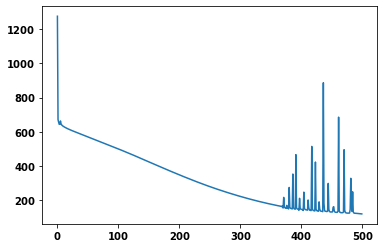

In [7]:
if __name__ == '__main__':
    main()